# Assignment 6: Apply NB

<ol>
    <li>Minimum data points need to be considered for people having 4GB RAM is <strong>50k</strong> and for 8GB RAM is <strong>100k</strong></li>
    <li>When you are using ramdomsearchcv or gridsearchcv you need not split the data into X_train,X_cv,X_test. As the above methods use kfold. The model will learn better if train data is more so splitting to X_train,X_test will suffice.</li>
    <li>If you are writing for loops to tune your model then you need split the data into X_train,X_cv,X_test.</li>
    <li>While splitting the data explore stratify parameter. </li>
    <li><strong>Apply Multinomial NB on these feature sets</strong></li>
        <ul>
            <li>Features that need to be considered</li> 
                <dl>
                  <dt>essay</dt>
                    <dd>while encoding essay, try to experiment with the max_features and n_grams parameter of vectorizers and see if it increases AUC score.</dd>
                  <dt>categorical features</dt>
                  <dd> - teacher_prefix</dd>
                  <dd> - project_grade_category</dd>
                  <dd> - school_state</dd>
                  <dd> - clean_categories</dd>
                  <dd> - clean_subcategories</dd>
                  <dt>numerical features</dt>
                  <dd> - price</dd>
                  <dd> - teacher_number_of_previously_posted_projects</dd>
                  <dd>while encoding the numerical features check <a href='https://imgur.com/ldZA1zg'>this</a> and <a href='https://ac-classroom-production.s3.amazonaws.com/public/COMMENT/Annotation_2020-05-21_225912_0lyZzN8.jpg'>this</a></dd>
                </dl>    
            <li><font color='red'>Set 1</font>: categorical, numerical features + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + preprocessed_eassay (TFIDF)</li>
        </ul>
    <li><strong>The hyper paramter tuning(find best alpha:smoothing parameter)</strong>
        <ul>
    <li>Consider alpha values in range: 10^-5 to 10^2 like [0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]</li>
    <li>Explore class_prior = [0.5, 0.5] parameter which can be present in MultinomialNB function(go through <a href='https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html'>this</a> ) then check how results might change.
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>For hyper parameter tuning using k-fold cross validation(use GridsearchCV or RandomsearchCV)/simple cross validation data (write for loop to iterate over hyper parameter values)</li>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/hUv6aEy.jpg' width=300px><dd>-while plotting take log(alpha) on your X-axis so that it will be more readable</dd></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://imgur.com/q2P65L5.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
        <img src='https://i.imgur.com/IdN5Ctv.png' width=300px><dd>-plot the confusion matrix in heatmaps, while plotting the confusion matrix go through the <a href='https://stackoverflow.com/questions/61748441/how-to-fix-the-values-displayed-in-a-confusion-matrix-in-exponential-form-to-nor'>link </a>
</dd></li>
        </ul>
<li>find the top 20 features from either from feature <font color='red'>Set 1</font> or feature <font color='red'>Set 2</font> using values of `feature_log_prob_ ` parameter of `MultinomialNB` 
(https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) and print <strong>BOTH</strong> positive as well as negative corresponding feature names. <dd> - go through the <a href='https://imgur.com/mWvE7gj'>link </a> </dd>
    </li>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

<h1>2. Naive Bayes </h1>

## 1.1 Loading Data

In [35]:
#make sure you are loading atleast 50k datapoints
#you can work with features of preprocessed_data.csv for the assignment.
# If you want to add more features, you can add. (This is purely optional, not mandatory)

import pandas
data = pandas.read_csv('/content/drive/MyDrive/data_to_google_colab/Copy of preprocessed_data.csv',nrows=15000)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [224]:
# write your code in following steps for task 1
# 1. Split your data.
# 2. Perform Bag of Words Vectorization of text data.
# 3. Perform tfidf vectorization of text data.
# 4. perform one-hot encoding of categorical features.
# 5. perform normalization of numerical features
# 6. For set 1 stack up all the features using hstack()
# 7. For set 2 stack up all the features using hstack()
# 8. Perform hyperparameter tuning and represent the training and cross-validation AUC scores for different 'alpha' values, using a 2D line plot.
# 9. Find the best hyperparameter 'alpha' and fit the model. Plot ROC-AUC curve(by obtaining the probabilities using 'predict proba' method)
# 10. Plot confusion matrix based on the best threshold value
# 11. Either for the model in set 1 or in set 2, print the top 20 features(you have to print the names, not the indexes) associated with the positive and negative classes each.
# 12. Summarize your observations and compare both the models(ie., from set 1 and set 2) in terms of optimal hyperparameter value, train AUC and test AUC scores. 
# 13. You can use Prettytable or any other tabular format for comparison.


# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label"
    
data.columns.values

    

array(['school_state', 'teacher_prefix', 'project_grade_category',
       'teacher_number_of_previously_posted_projects',
       'project_is_approved', 'clean_categories', 'clean_subcategories',
       'essay', 'price'], dtype=object)

In [36]:
y=data["project_is_approved"]
x=data.drop(["project_is_approved"],axis=1)
# Split the dataset 


# 1) If you want to apply simple cross-validation, split the dataset into 3 parts (ie., train, CV and test sets)
# 2) If you want to apply K-fold CV (or) GridSearch Cross Validation (or) Randomized Search Cross Validation, just split the dataset into 2 parts (ie., train and test sets)



In [5]:
x.head()

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03
2,ca,mrs,grades_prek_2,10,literacy_language,literacy,having class 24 students comes diverse learner...,329.00
3,ga,mrs,grades_prek_2,2,appliedlearning,earlydevelopment,i recently read article giving students choice...,481.04
4,wa,mrs,grades_3_5,2,literacy_language,literacy,my students crave challenge eat obstacles brea...,17.74


In [37]:
#spliting train, test and cross validation data


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y)
x_tr, x_cv, y_tr, y_cv = train_test_split(x_train, y_train, test_size=0.3, stratify=y_train)

In [12]:
###  length of train ,cv,cross validation data
print(len(x_tr))
print(len(x_test))
print(len(x_cv))

7350
4500
3150


<h2>1.3 Make Data Model Ready: encoding essay, and project_title</h2>

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
# Applying  Bag of Words (BOW) vectorization on 'Preprocessed_Essay' 

vectorizer=CountVectorizer(ngram_range=(1,4),min_df=10,max_features=5000)

vectorizer.fit(x_tr["essay"].values)

x_train_bow=vectorizer.transform(x_tr["essay"].values)

x_cv_bow=vectorizer.transform(x_cv["essay"].values)

x_test_bow=vectorizer.transform(x_test["essay"].values)
feature_names = vectorizer.get_feature_names()
len(feature_names)


print(x_train_bow.shape)
print(x_cv_bow.shape)
print(x_test_bow.shape)


(7350, 5000)
(3150, 5000)
(4500, 5000)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

In [14]:
# Apply One-Hot Encoding on school state feature 

vectorizer.fit(x_tr["school_state"].values)

x_train_state=vectorizer.transform(x_tr["school_state"].values)
x_cv_state=vectorizer.transform(x_cv["school_state"].values)
x_test_state=vectorizer.transform(x_test["school_state"].values)

feature_names.extend(vectorizer.get_feature_names())

print("After vectorizations")
print(x_train_state.shape)
print(x_cv_state.shape)
print(x_test_state.shape)






After vectorizations
(7350, 49)
(3150, 49)
(4500, 49)


In [15]:

#aplying onehot encoding for teacher prefix

vectorizer=CountVectorizer()
vectorizer.fit(x_tr["teacher_prefix"].values)

x_train_tchr=vectorizer.transform(x_tr["teacher_prefix"].values)


x_cv_tchr=vectorizer.transform(x_cv["teacher_prefix"].values)


x_test_tchr=vectorizer.transform(x_test["teacher_prefix"].values)

feature_names.extend(vectorizer.get_feature_names())

print("after one hot encoding")

print(x_train_tchr.shape)

print(x_cv_tchr.shape)

print(x_test_tchr.shape)

len(feature_names)

after one hot encoding
(7350, 5)
(3150, 5)
(4500, 5)


5054

In [17]:
#  encoding for project grade category  through bag of words

vectorizer=CountVectorizer()
vectorizer.fit(x_tr["project_grade_category"].values)

x_train_project=vectorizer.transform(x_tr["project_grade_category"].values)


x_cv_project=vectorizer.transform(x_cv["project_grade_category"].values)


x_test_project=vectorizer.transform(x_test["project_grade_category"].values)
feature_names.extend(vectorizer.get_feature_names())

print("after one hot encoding")

print(x_train_project.shape)
print(x_cv_project.shape)
print(x_test_project.shape)


after one hot encoding
(7350, 4)
(3150, 4)
(4500, 4)


In [18]:
#onehot encoding for clean_categories

vectorizer=CountVectorizer()
vectorizer.fit(x_tr["clean_categories"].values)

x_train_clean_cat=vectorizer.transform(x_tr["clean_categories"].values)


x_cv_clean_cat=vectorizer.transform(x_cv["clean_categories"].values)


x_test_clean_cat=vectorizer.transform(x_test["clean_categories"].values)

feature_names.extend(vectorizer.get_feature_names())

print("after one hot encoding")

print(x_train_clean_cat.shape)
print(x_cv_clean_cat.shape)
print(x_test_clean_cat.shape)

after one hot encoding
(7350, 7)
(3150, 7)
(4500, 7)


In [19]:
vectorizer=CountVectorizer()
vectorizer.fit(x_tr["clean_subcategories"].values)

x_train_clean_subcat=vectorizer.transform(x_tr["clean_subcategories"].values)


x_cv_clean_subcat=vectorizer.transform(x_cv["clean_subcategories"].values)


x_test_clean_subcat=vectorizer.transform(x_test["clean_subcategories"].values)
feature_names.extend(vectorizer.get_feature_names())

print("after one hot encoding")

print(x_train_clean_subcat.shape)
print(x_cv_clean_subcat.shape)
print(x_test_clean_subcat.shape)

after one hot encoding
(7350, 28)
(3150, 28)
(4500, 28)


In [20]:
from sklearn.preprocessing import Normalizer

norm=Normalizer()

#norm.fit(x_tr["price"].values.reshape(-1,1))

x_tr_price=norm.fit_transform(x_tr["price"].values.reshape(-1,1))

x_cv_price=norm.fit_transform(x_cv["price"].values.reshape(-1,1))

x_test_price=norm.fit_transform(x_test["price"].values.reshape(-1,1))

feature_names.append("price")
print("size after one hot encoding")

print(x_tr_price.shape)
print(x_cv_price.shape)
print(x_test_price.shape)


size after one hot encoding
(7350, 1)
(3150, 1)
(4500, 1)


<h2>1.5 Appling NB on different kind of featurization as mentioned in the instructions</h2>

<br>Apply NB on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

#### Set 1

In [22]:
from scipy.sparse import hstack

x_tr=hstack((x_train_bow,x_train_state,x_train_tchr,x_train_project,x_train_clean_cat,x_train_clean_subcat,x_tr_price)).tocsr()

x_cv=hstack((x_cv_bow,x_cv_state,x_cv_tchr,x_cv_project,x_cv_clean_cat,x_cv_clean_subcat,x_cv_price)).tocsr()

x_test=hstack((x_test_bow,x_test_state,x_test_tchr,x_test_project,x_test_clean_cat,x_test_clean_subcat,x_test_price)).tocsr()

print("Final Data matrix")
print(x_tr.shape,y_tr.shape)
print(x_cv.shape,y_cv.shape)
print(x_test.shape)
print("="*100)

Final Data matrix
(7350, 5094) (7350,)
(3150, 5094) (3150,)
(4500, 5094)


/usr/local/lib/python3.8/dist-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


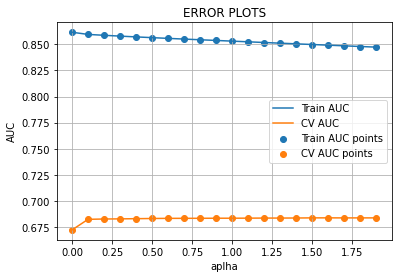

In [24]:

import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
import numpy as np
from sklearn.metrics import roc_auc_score



# Perform Hyperparameter Tuning.

train_auc = []
cv_auc = []
K = np.arange(0,2,0.1)

for i in K:
  clf=MultinomialNB(alpha=i)
  clf.fit(x_tr,y_tr)

  y_tr_predicted=clf.predict_proba(x_tr)[:,1]
  y_cv_predicted=clf.predict_proba(x_cv)[:,1]
  

  train_auc.append(roc_auc_score(y_tr,y_tr_predicted))
  cv_auc.append(roc_auc_score(y_cv, y_cv_predicted))

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("aplha")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()


# Plot the training and the CV AUC scores, for different values of 'alpha', using a 2D line plot



In [26]:
#combiningg train and cv data
from scipy.sparse import vstack
x_tr_cv=vstack((x_tr,x_cv)).tocsr()

0.8364263436184596
0.5043868049487692


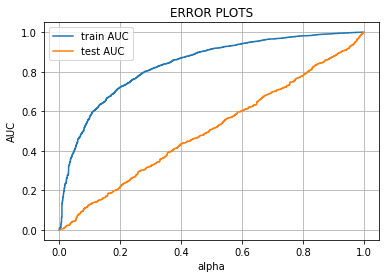

In [27]:
from sklearn.metrics import roc_curve, auc
# Obtain the optimal value for 'alpha' and using the obtained optimal 'alpha' value, fit a multinomial naive bayes model, on the train data,
best_alpha=2
# Note: If you have split the datase into 3 parts (ie., train, cv and test sets) in the beginning, then the training datafor this final model would be (train set + cv set)
clf=MultinomialNB(alpha=best_alpha)

clf.fit(x_tr_cv,y_train)

yy=clf.predict_proba(x_tr_cv)[:,1]
y_tes=clf.predict_proba(x_test)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, yy)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_tes)
print(auc(train_fpr,train_tpr))
auc_score_bow=auc(test_fpr, test_tpr)

print(auc_score_bow)
plt.plot(train_fpr, train_tpr, label="train AUC" )
plt.plot(test_fpr, test_tpr, label="test AUC")

plt.legend()
plt.xlabel("alpha")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

# Make class label and probability predictions on the train and test data.


In [28]:
# Plot the ROC-AUC curves using the probability predictions made on train and test data.
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

In [29]:
# Pick the best threshold among the probability estimates, such that it has to yield maximum value for TPR*(1-FPR) the basis of the best threshod probability estimate.

# Plot the confusion matrices(each for train and test data) afer encoding the predicted class labels, on

def predict_with_best(threshold,proba):
  predictions = []
  for i in proba:
    if i>threshold:
      predictions.append(1)
    else:
      predictions.append(0)

  return(predictions)    



In [30]:
print("="*100)
from sklearn.metrics import confusion_matrix

best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train,predict_with_best(best_t,yy)))
print("Test confusion matrix")
print(confusion_matrix(y_test,predict_with_best(best_t,y_tes)))

print(best_t)

the maximum value of tpr*(1-fpr) 0.57848481054857 for threshold 0.887
Train confusion matrix
[[1199  302]
 [2483 6516]]
Test confusion matrix
[[ 226  417]
 [1409 2448]]
0.8874475666507784


In [31]:
from sklearn.metrics import accuracy_score



print(accuracy_score(y_test,predict_with_best(best_t,y_tes))*100)

59.42222222222222


In [ ]:
#set--2 esssay encoded in tf-idf

#### Set 2

In [38]:
# Apply TF-IDF vectorization on 'Preprocessed_Essay'
zer=TfidfVectorizer(max_features=5000)

zer.fit(x_tr["essay"].values)
x_train_tfidf=zer.transform(x_tr["essay"].values)

x_cv_tfidf=zer.transform(x_cv["essay"].values)

x_test_tfidf=zer.transform(x_test["essay"].values)

print(x_train_tfidf.shape)
print(x_cv_tfidf.shape)
print(x_test_tfidf.shape)

(7350, 5000)
(3150, 5000)
(4500, 5000)


In [39]:
###combining  encodeed features using hstack 
x_tr_tf=hstack((x_train_tfidf,x_train_state,x_train_tchr,x_train_project,x_train_clean_cat,x_train_clean_subcat,x_tr_price)).tocsr()

x_cv_tf=hstack((x_cv_tfidf,x_cv_state,x_cv_tchr,x_cv_project,x_cv_clean_cat,x_cv_clean_subcat,x_cv_price)).tocsr()

x_test_tf=hstack((x_test_tfidf,x_test_state,x_test_tchr,x_test_project,x_test_clean_cat,x_test_clean_subcat,x_test_price)).tocsr()

/usr/local/lib/python3.8/dist-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


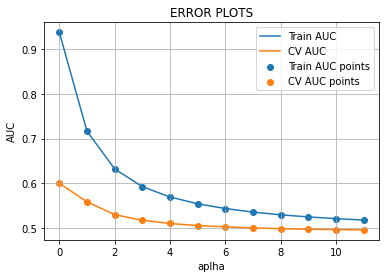

In [41]:
# Perform Hyperparameter Tuning.

alpharange=np.arange(0,12,1)

train_au=[]
cv_au=[]

for i in alpharange:
  clf=MultinomialNB(alpha=i)
  clf.fit(x_tr_tf,y_tr)

  y_tr_predicted=clf.predict_proba(x_tr_tf)[:,1]
  y_cv_predicted=clf.predict_proba(x_cv_tf)[:,1]
  

  train_au.append(roc_auc_score(y_tr,y_tr_predicted))
  cv_au.append(roc_auc_score(y_cv, y_cv_predicted))

plt.plot(alpharange, train_au, label='Train AUC') 
plt.plot(alpharange, cv_au, label='CV AUC')

plt.scatter(alpharange, train_au, label='Train AUC points')
plt.scatter(alpharange, cv_au, label='CV AUC points')

plt.legend()
plt.xlabel("aplha")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()



# Plot the training and the CV AUC scores, for different values of 'alpha', using a 2D line plot



In [43]:
X=vstack((x_tr_tf,x_cv_tf)).tocsr()

0.5335907853852146
0.4828505542829563


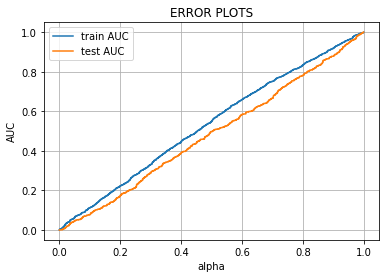

In [44]:

# Obtain the optimal value for 'alpha' and using the obtained optimal 'alpha' value, fit a multinomial naive bayes model, on the train data,

best_alpha=10

mul=MultinomialNB(alpha=best_alpha)

mul.fit(X,y_train)

yy=mul.predict_proba(X)[:,1]
y_tes=mul.predict_proba(x_test_tf)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, yy)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_tes)
print(auc(train_fpr,train_tpr))
auc_score_tf_idf=auc(test_fpr, test_tpr)
print(auc_score_tf_idf)

plt.plot(train_fpr, train_tpr, label="train AUC" )
plt.plot(test_fpr, test_tpr, label="test AUC")

plt.legend()
plt.xlabel("alpha")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

# Note: If you have split the datase into 3 parts (ie., train, cv and test sets) in the beginning, then the training datafor this final model would be (train set + cv set)
# Make class label and probability predictions on the train and test data.


In [47]:
# Plot the ROC-AUC curves using the probability predictions made on train and test data.

from sklearn.metrics import accuracy_score
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train,predict_with_best(best_t,yy)))
print("Test confusion matrix")
print(confusion_matrix(y_test,predict_with_best(best_t,y_tes)))



print("the accuracy score is ",accuracy_score(y_test,predict_with_best(best_t,y_tes))*100,"%")


the maximum value of tpr*(1-fpr) 0.27804421825239445 for threshold 1.0
Train confusion matrix
[[ 738  763]
 [3911 5088]]
Test confusion matrix
[[ 264  379]
 [1677 2180]]
the accuracy score is  54.31111111111111 %


In [48]:
# Either from set 1 (or) set 2, print the names of the top 20 features associated with the positive and negative classes each. (You have to print the names of the features, but not the indexes)


feature_log_probabilities=clf.feature_log_prob_
feature_log_probabilities


array([[-8.75616147, -8.74548591, -8.58399313, ..., -7.55491664,
        -6.78578355, -4.2245936 ],
       [-9.42330658, -9.29665361, -8.67199514, ..., -7.2209891 ,
        -5.92170611, -3.20729659]])

In [50]:
top_20_positive = np.argsort(feature_log_probabilities[1, :])[:20]
print("Top 20 positive features:", [feature_names[i] for i in top_20_positive])

# Print the names of the top 20 features for the negative class
top_20_negative = np.argsort(feature_log_probabilities[0, :])[:20]
print("Top 20 negative features:", [feature_names[i] for i in top_20_negative])

Top 20 positive features: ['towards', 'we also', 'students deserve', 'classroom our', 'eager learn', 'choose sit', 'around', 'my students hard', 'dry', 'latest', 'always eager', 'graphs', 'we always', 'budget', 'dr', 'struggling students', 'class this', 'my students not', '2017', 'students every']
Top 20 negative features: ['nd', 'dr', 'stamina', 'come many', 'spot', 'regularly', 'spirit', 'reinforce', 'standard', 'intelligent', 'open', 'energetic', 'conversations', 'instruments', 'they not', 'ends', 'fits', 'first year', 'it allow', 'engaging']


In [51]:
from prettytable import PrettyTable
x = PrettyTable()

In [52]:
x.add_column("vectorizer",["bag of words","tf-idf"])
x.add_column("method",["brute","brute"])
x.add_column("hyperparameter",["2","2"])
x.add_column("auc_score",[auc_score_bow,auc_score_tf_idf])

In [53]:
print(x)

+--------------+--------+----------------+--------------------+
|  vectorizer  | method | hyperparameter |     auc_score      |
+--------------+--------+----------------+--------------------+
| bag of words | brute  |       2        | 0.5043868049487692 |
|    tf-idf    | brute  |       2        | 0.4828505542829563 |
+--------------+--------+----------------+--------------------+
